# [IAPR 2020:][iapr2020] Lab 2 ‒  Object description

**Authors:** Quentin Talon, Albéric De Lajarte 
**Due date:** 24.04.2020

[iapr2020]: https://github.com/LTS5/iapr-2020

## Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Part 1
In the `lab-02-data/part1` folder, you will find 28x28 grey-scale pictures of handwritten "0" and "1".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

Your goal is to extract, from each of those images, a 2-dimensional feature vector (i.e. 2 features) and to plot them all on a 2D graph.
If you have chosen good features, the vectors of the "0"'s should nicely cluster in one part of the plane and those of the "1"'s in another.

Please try first the Fourier Descriptors.
You can make several attempts: e.g. with and without invariance to rotation, translation, scaling, etc.
You can also for instance rotate the images and assess the invariance in rotation.

**Note:** for the Fourier descriptors, the u_k signal has to be constructed by following the contour point after point.
Some pre-processing (image binarization, possibly some Mathematical Morphology) might be useful.

Then feel free to try other features, the more you try, the better it will be (for you).

### 1.1 Data visualization

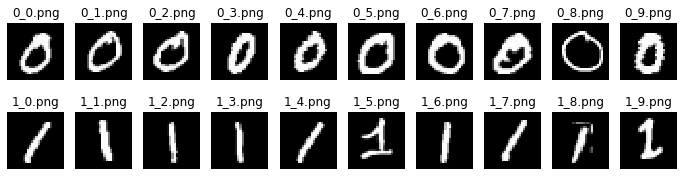

In [2]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

# Load images
data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
#  Load zeros
zeros_path = os.path.join(data_base_path, data_folder, 'part1', '0')
zeros_names = [nm for nm in os.listdir(zeros_path) if '.png' in nm]  # make sure to only load .png
zeros_names.sort()  # sort file names
ic = skimage.io.imread_collection([os.path.join(zeros_path, nm) for nm in zeros_names])
zeros_im = skimage.io.concatenate_images(ic)
#  Load ones
ones_path = os.path.join(data_base_path, data_folder, 'part1', '1')
ones_names = [nm for nm in os.listdir(ones_path) if '.png' in nm]  # make sure to only load .png
ones_names.sort()  # sort file names
ic = skimage.io.imread_collection(([os.path.join(ones_path, nm) for nm in ones_names]))
ones_im = skimage.io.concatenate_images(ic)

# Plot images
fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

### 1.2.1 Fourier descriptor
- We find a contour description of our object
- We create a vector containing it's (x,y) coordinates in form of (x+jy)
- We perform a Fourier Transform via the fft algorithm on our vector
- We select the Fourier coefficiants we want
- We show the amplitudes of a descriptor couple for *ones* and *zeros*

#### Why the amplitude ?
The Fourier transform is sensible to where we start the description of a loop.
$$ 
f_l = \sum_{k}x_k e^{-2\pi j\color{red}{k}l/N}
$$
It will change each $f_l$ phase. We can change the DFT to something that is independant of the starting description point OR look at the amplitude only.

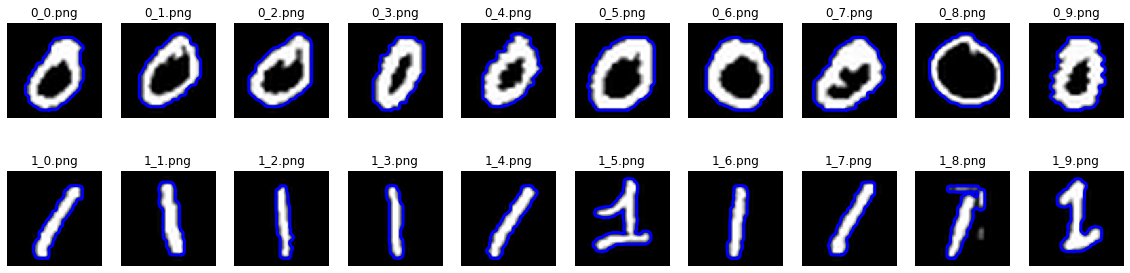

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.measure import find_contours
from skimage.segmentation import active_contour
from scipy import ndimage

zeros_contour = []
ones_contour = []

fig, axes = plt.subplots(2, len(zeros_im), figsize=(20, 5))
for ax, im, nm, k in zip(axes[0], zeros_im, zeros_names, np.arange(0, zeros_im.shape[0]) ):
    ax.imshow(ndimage.zoom(im, scale_factor), cmap='gray')
    zeros_contour.append(find_contours(ndimage.zoom(im, scale_factor), 10)[0])
    ax.plot(zeros_contour[k][:, 1], zeros_contour[k][:, 0], '-b', lw=3)
    ax.axis('off')
    ax.set_title(nm)
    
for ax, im, nm, k in zip(axes[1], ones_im, ones_names, np.arange(0, zeros_im.shape[0])):
    ax.imshow(ndimage.zoom(im, scale_factor), cmap='gray')
    ones_contour.append(find_contours(ndimage.zoom(im, scale_factor), 10)[0])
    ax.plot(ones_contour[k][:, 1], ones_contour[k][:, 0], '-b', lw=3)
    ax.axis('off')
    ax.set_title(nm)

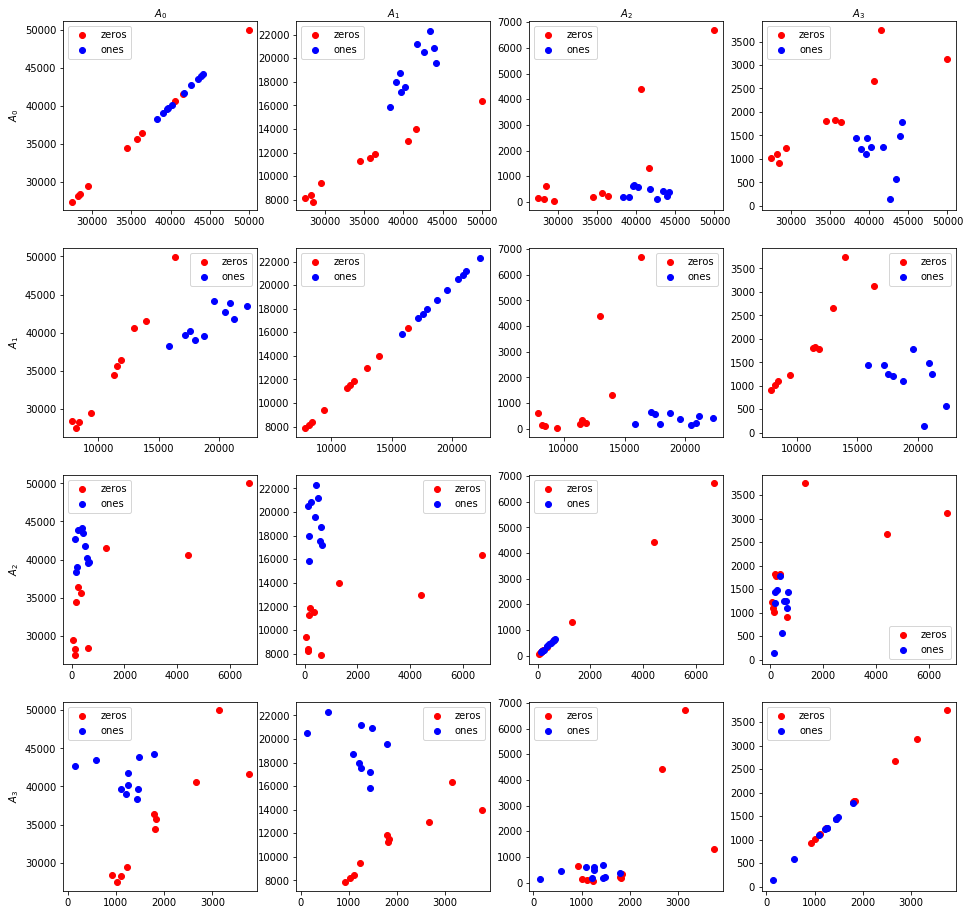

In [45]:
#plt.imshow(np.where(ones_im[0] > 0.8, 1, 0))
desc = np.array([0, 1, 2, 3]) #Which values from the Fourier Transform we want to keep

ones_complex = [[np.complex(x[1], x[0]) for x in X] for X in ones_contour[0:10]]
ones_FFT = [np.fft.fft(x)[desc] for x in ones_complex]

zeros_complex = [[np.complex(x[1], x[0]) for x in X] for X in zeros_contour[0:10]]
zeros_FFT = [np.fft.fft(x)[desc] for x in zeros_complex]

fig, axes = plt.subplots(len(desc), len(desc), figsize=(16, 16))#quadrillage de plot

for i, (di, axi) in enumerate(zip(desc, axes)):
    axi[0].set_ylabel("$A_{}$".format(di))
    for j, (dj, ax) in enumerate(zip(desc, axi)) :
        if(i == 0):
            ax.set_xlabel("$A_{}$".format(dj))
            ax.xaxis.set_label_position('top')
            #ax.xaxis.set_ticks_position('top')
        X = [abs(vec[i]) for vec in ones_FFT]
        Y = [abs(vec[j]) for vec in ones_FFT]
        ax.scatter(X,Y, color='red', marker="o", label = "zeros")
    
        X = [abs(vec[i]) for vec in zeros_FFT]
        Y = [abs(vec[j]) for vec in zeros_FFT]
        ax.scatter(X,Y, color='blue', marker="o", label = "ones")
    
        #ax.set_xlabel("$A_{}$".format(di))
        #ax.set_ylabel("$A_{}$".format(dj))
        ax.legend()
plt.show()

From this matrix, we see few thigs :
- Only one descriptor is not enough
- **TODO**

### 1.3 Additional method(s)
Add your implementation and discussion

#### 1.3.1 Fourier descriptor via binary image
- We simply create a binary image by setting an arbitrary treshold.
- We create a vector containing the (x,y) coordinates in form of (x+jy)
- We perform a Fourier Transform via the fft algorithm on our vector
- We select the Fourier coefficiants we want
- We show the real and imaginary parts of these Fourier coef. for *ones* and *zeros*

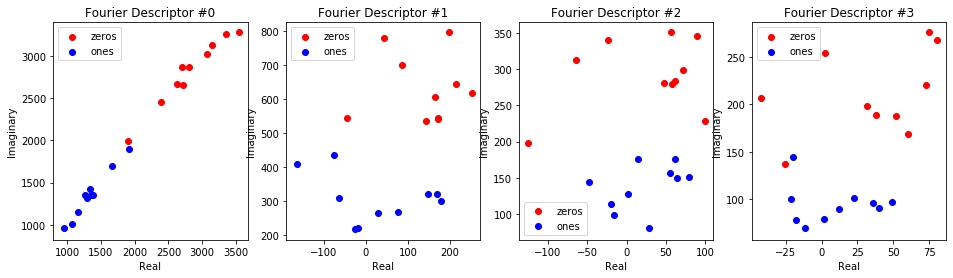

In [46]:
import numpy as np
#plt.imshow(np.where(ones_im[0] > 0.8, 1, 0))
desc = [0, 1, 2, 3] #Which values from the Fourier Transform we want to keep
th=0.8 #Stupid treshold to get Binary image.

vecones_fd = [np.fft.fft([np.complex(i,j) for i, l in enumerate(np.where(x > 0.8, 1, 0)) for j, c in enumerate(l) if c > 0])[desc] for x in ones_im[0:11]]
veczeros_fd = [np.fft.fft([np.complex(i,j) for i, l in enumerate(np.where(x > 0.8, 1, 0)) for j, c in enumerate(l) if c > 0])[desc] for x in zeros_im[0:11]]

fig, axes = plt.subplots(1, len(desc), figsize=(16, 16/len(desc)))
for i, (d, ax) in enumerate(zip(desc, axes)):    
    X = [vec[i].real for vec in veczeros_fd]
    Y = [vec[i].imag for vec in veczeros_fd]
    ax.scatter(X,Y, color='red', marker="o", label = "zeros")
    
    X = [vec[i].real for vec in vecones_fd]
    Y = [vec[i].imag for vec in vecones_fd]
    ax.scatter(X,Y, color='blue', marker="o", label = "ones")
    
    ax.set_xlabel("Real")
    ax.set_ylabel("Imaginary")
    ax.set_title("Fourier Descriptor #{}".format(d))
    ax.legend()
plt.show()

The result is nice as we see clusters separated and regularity in different clusters. It takes less calculus to create the image but more calculus to compute the Fourier transform.

#### 1.3.2 Fourier descriptor via grayscale image

- We keep the grayscale image
- We create a vector containing the (x,y) coordinates in form of image(x,y)*(x+jy)
- We perform a Fourier Transform via the fft algorithm on our vector
- We select the Fourier coefficiants we want
- We show the real and imaginary parts of these Fourier coef. for *ones* and *zeros*

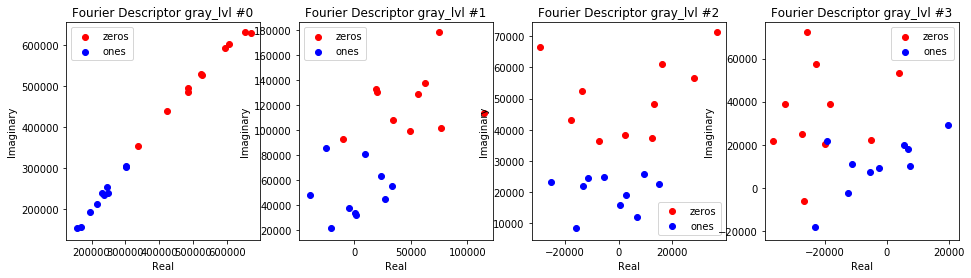

In [47]:
import numpy as np
desc = [0, 1, 2, 3] #Which values from the Fourier Transform we want to keep

vecones_fd_gray = [np.fft.fft([c*np.complex(i,j) for i, l in enumerate(x) for j, c in enumerate(l) if c > 0])[desc] for x in ones_im[0:11]]
veczeros_fd_gray = [np.fft.fft([c*np.complex(i,j) for i, l in enumerate(x) for j, c in enumerate(l) if c > 0])[desc] for x in zeros_im[0:11]]

fig, axes = plt.subplots(1, len(desc), figsize=(16, 16/len(desc)))
for i, (d, ax) in enumerate(zip(desc, axes)):    
    X = [vec[i].real for vec in veczeros_fd_gray]
    Y = [vec[i].imag for vec in veczeros_fd_gray]
    ax.scatter(X,Y, color='red', marker="o", label = "zeros")
    
    X = [vec[i].real for vec in vecones_fd_gray]
    Y = [vec[i].imag for vec in vecones_fd_gray]
    ax.scatter(X,Y, color='blue', marker="o", label = "ones")
    
    ax.set_xlabel("Real")
    ax.set_ylabel("Imaginary")
    ax.set_title("Fourier Descriptor gray_lvl #{}".format(d))
    ax.legend()
plt.show()

This was a bad idea since the beginning as multiplying the (x+iy) complex number by a value between 0 and 1 makes values an identical result as changing the coordinates. So we don't weight the descriptor, we change their meaning.

As we have few low value pixels, it doesn't affect much the output.

#### 1.3.3 Invariences (Translation, Rotation, Scale)
Let's try them !

## Part 2
The `lab-02-data/part2` folder contains grey-scale pictures of handwritten "2" and "3".
Extract the same feature (typically 2 Fourier descriptors) as in part 1 also on these images and plot them on the same graph as the features of the "0" and "1".
Is it possible to discriminate all these 4 digits with a 2-dimensional feature vector?

### 2.1 Data visualization

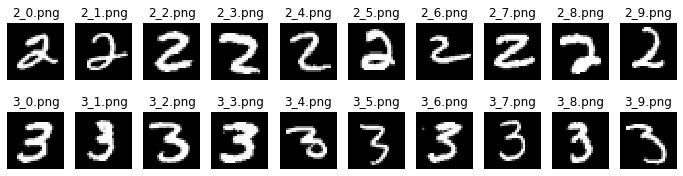

In [48]:
#  Load zeros
twos_path = os.path.join(data_base_path, data_folder, 'part2', '2')
twos_names = [nm for nm in os.listdir(twos_path) if '.png' in nm]  # make sure to only load .png
twos_names.sort()  # sort file names
ic = skimage.io.imread_collection([os.path.join(twos_path, nm) for nm in twos_names])
twos_im = skimage.io.concatenate_images(ic)
#  Load ones
threes_path = os.path.join(data_base_path, data_folder, 'part2', '3')
threes_names = [nm for nm in os.listdir(threes_path) if '.png' in nm]  # make sure to only load .png
threes_names.sort()  # sort file names
ic = skimage.io.imread_collection(([os.path.join(threes_path, nm) for nm in threes_names]))
threes_im = skimage.io.concatenate_images(ic)

# Plot images
fig, axes = plt.subplots(2, len(twos_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

### 2.2 Additional method(s) and conclusion
Add your implementations and discussions here